# Problem 1

## (a)

In [ ]:
def J(theta):
    return theta**2 + 2/theta**2

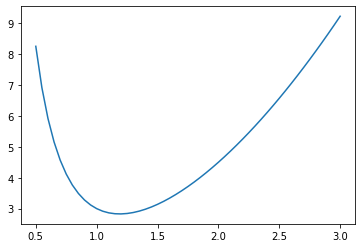

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
xRange = np.linspace(start = 0.5, stop = 3, num = 51)
yValues = J(xRange)
plt.plot(xRange, yValues)
plt.show()

**Solving it analytically, the anser is $2^{(1/4)} = 1.18$**


## (b)

convex!!!

## (c)

### fixed $\epsilon$

In [ ]:
def gradient_J(theta):
    return 2*theta - 4/theta**3

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

theta = np.zeros(m)
theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        theta[i] = theta[i-1] - epsilon * gradient_J(theta[i-1])

print(theta[-1])

1.189207115002721


### decreasing $\epsilon$

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

theta = np.zeros(m)
theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        theta[i] = theta[i-1] - epsilon * gradient_J(theta[i-1]) / (i+1)

print(theta[-1])

1.179245308261334


## (d)

In [ ]:
from scipy.stats import expon
def sample_from_theta(theta):
    return expon.rvs(scale = 1/theta)

In [ ]:
def J_prime(theta):
    delta = 0.1
    m = 1000

    samples = np.zeros(m)
    for i in range(m):
        s0 = sample_from_theta(theta)
        s1 = sample_from_theta(theta+delta)
        sample = s1**2 + (theta+delta)**2 - s0**2 - theta**2
        samples[i] = sample

    return np.mean(samples)

## (e)

### fixed $\epsilon$

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

theta = np.zeros(m)
theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        theta[i] = theta[i-1] - epsilon * J_prime(theta[i-1])

print(theta[-1])

1.1353697600975337


### decreasing $\epsilon$

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

theta = np.zeros(m)
theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        theta[i] = theta[i-1] - epsilon * J_prime(theta[i-1]) / (i+1)

print(theta[-1])

1.0484112016751532


## (e)

*compare  the  speed  of  convergence  of  the  deterministic  problem  vs.   the  stochasticone*

**Ans: WLOG, we compare the cases where $\epsilon$ is fixed**

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

deterministic_theta = np.zeros(m)
deterministic_theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        deterministic_theta[i] = deterministic_theta[i-1] - epsilon * gradient_J(deterministic_theta[i-1])

In [ ]:
init_theta= 1.0    
m  = 100 # iterations
epsilon = 0.075

stochastic_theta = np.zeros(m)
stochastic_theta[0] = init_theta

for i in range(m):
    if i == 0:
        pass
    else:
        stochastic_theta[i] = stochastic_theta[i-1] - epsilon * J_prime(stochastic_theta[i-1])

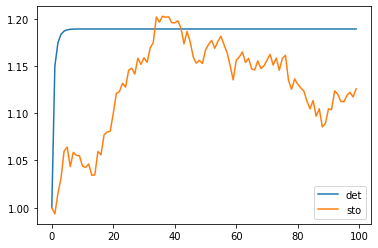

In [ ]:
plt.plot(deterministic_theta, label="det")
plt.plot(stochastic_theta, label="sto")
plt.legend()

*which approach works overall best?*

**Ans: The deterministic one.**

- **convergence rate**
- **computational budget**

*provide a heuristic for applying the descent algorithm (how do you decide when terminate?).*

**Ans: when there is a change between steps being smaller than 0.001, then stop. But this varies with the scales of the problem, so maybe change this fixed hyperparameter into some ratio such as 0.1%.**